In [3]:
# ===============================
# 1. Libraries
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# ===============================
# 2. Load Heart Disease Dataset
# ===============================
df = pd.read_csv('/content/Original Dataset.csv')  # 🔁 path change korle ekhane

print(df.shape)
df.head()


(1106, 17)


,Name,Age,Gender,TO,TH,AH,BH,OX2,OXK,OX9,A,M,Rickettsia_Suspect,Acute_typhoid,Paratyphoid_A,Paratyphoid_B,Typhoid
0,gAAAAABogxzS5EEbf73hk5aCmUTW-sZm7JguQy991RjGTP...,5y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:320""","""1:320""","""1:80""","""1:80""","""1:80""",Yes,No,No,No,Negative
1,gAAAAABogxzSPxqjjXarnFAQwWiRBMIfqcWILZNj1Kco4t...,3.5y,Male,"""1:160""","""1:80""","""1:80""","""1:80""",NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,Minimal
2,gAAAAABogxzSXhet-9e_mniQeaztJLKicAOe-sBhQhKt-G...,45y,Male,"""1:80""","""1:80""","""1:80""","""1:80""","""1:160""","""1:160""","""1:80""",NaN,NaN,Yes,No,No,No,Negative
3,gAAAAABogxzSEeL63vvluPQgs7voTJeL-H3Aus-MMeO-X4...,13y,Female,"""1:80""","""1:160""","""1:80""","""1:80""","""1:160""","""1:320""","""1:80""","""1:80""","""1:160""",Yes,No,No,No,Minimal
4,gAAAAABogxzSqjG6cpo0dqBciuhJf4axeyfgArg5dLYZAh...,12y,Female,"""1:160""","""1:320""","""1:80""","""1:80""","""1:160""","""1:160""","""1:320""","""1:80""","""1:80""",Yes,Yes,No,No,Positive


In [8]:
def age_to_years(age):
    try:
        age = str(age).lower().strip()

        if age == '' or age == 'nan' or age == 'none':
            return np.nan

        if 'm' in age:        # months
            return float(age.replace('m', '')) / 12
        elif 'y' in age:      # years
            return float(age.replace('y', ''))
        else:                 # numeric string
            return float(age)

    except:
        return np.nan



In [9]:
# ===============================
# 3. Data Cleaning (ABSOLUTE FINAL)
# ===============================

# Drop Name column if exists
df.drop(columns=['Name'], errors='ignore', inplace=True)

# Replace string NaN
df.replace('NaN', np.nan, inplace=True)

# Convert Age safely
df['Age'] = df['Age'].apply(age_to_years)

# Now drop missing rows
df.dropna(inplace=True)


In [10]:

# ===============================
# 4. Label Encoding
# ===============================
le = LabelEncoder()

categorical_cols = [
    'Gender', 'TO', 'TH', 'AH', 'BH', 'OX2', 'OXK', 'OX9',
    'A', 'M', 'Rickettsia_Suspect',
    'Acute_typhoid ', 'Paratyphoid_A ', 'Paratyphoid_B'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [11]:
# ===============================
# 5. Target Creation (IMPORTANT 🔥)
# ===============================
# Positive → 1
# Negative / Minimal → 0

df['Typhoid_Risk'] = df['Typhoid'].apply(
    lambda x: 1 if x == 'Positive' else 0
)

df.drop(columns=['Typhoid'], inplace=True)

print(df['Typhoid_Risk'].value_counts())





Typhoid_Risk
0    607
1     45
Name: count, dtype: int64


In [12]:
# ===============================
# 6. Feature & Target Split
# ===============================
X = df.drop(columns=['Typhoid_Risk'])
y = df['Typhoid_Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [13]:
# ===============================
# 7. Feature Scaling
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9263803680981595


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 0.9447852760736196


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.950920245398773


In [17]:
dt = DecisionTreeClassifier(
    criterion='entropy',        # instead of gini
    max_depth=3,                # tree chhoto
    min_samples_split=25,       # split korte minimum sample
    min_samples_leaf=15,        # leaf e minimum data
    max_features='sqrt',        # random feature selection
    ccp_alpha=0.01,             # pruning 🔥
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Decision Tree Accuracy: 0.901840490797546
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       152
           1       0.31      0.36      0.33        11

    accuracy                           0.90       163
   macro avg       0.63      0.65      0.64       163
weighted avg       0.91      0.90      0.91       163



In [18]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 0.901840490797546


In [19]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random forest Accuracy:", accuracy_score(y_test, y_pred))


Random forest Accuracy: 0.9877300613496932


In [20]:
gb = GradientBoostingClassifier(
    n_estimators=40,          # কম tree
    learning_rate=0.03,       # slow learning
    max_depth=1,              # decision stump 🔥
    min_samples_split=30,
    min_samples_leaf=20,
    subsample=0.5,            # stochastic GB
    max_features='sqrt',      # feature randomness
    random_state=42
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Gradient Boosting Accuracy: 0.9325153374233128
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       152
           1       0.00      0.00      0.00        11

    accuracy                           0.93       163
   macro avg       0.47      0.50      0.48       163
weighted avg       0.87      0.93      0.90       163



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
xgb = XGBClassifier(
    n_estimators=20,
    max_depth=1,            # stump
    learning_rate=0.03,
    subsample=0.5,
    colsample_bytree=0.5,
    min_child_weight=10,
    gamma=0.5,
    reg_alpha=1.0,          # L1
    reg_lambda=2.0,         # L2
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.9325153374233128
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       152
           1       0.00      0.00      0.00        11

    accuracy                           0.93       163
   macro avg       0.47      0.50      0.48       163
weighted avg       0.87      0.93      0.90       163



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 🔴 Random Forest: harder banano
rf = RandomForestClassifier(
    n_estimators=50,       # tree komano
    max_depth=3,           # depth komano
    min_samples_split=15,
    min_samples_leaf=10,
    bootstrap=False,       # randomness barano
    random_state=42
)

# 🔴 XGBoost: strong regularization
xgb = XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=2,
    subsample=0.5,
    colsample_bytree=0.5,
    gamma=5,                 # leaf split e strong regularization
    reg_alpha=1,             # L1 regularization
    reg_lambda=2,            # L2 regularization
    random_state=42
)

# 🔴 Stacking Hybrid Model
hybrid_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(C=0.1, max_iter=500),  # strong regularization
    cv=5
)

# 🔴 Optional: small noise add kora training e
xtrain_noisy = X_train + np.random.normal(0, 0.05,X_train.shape)

# 🔴 Fit and predict
hybrid_model.fit(xtrain_noisy, y_train)
y_pred = hybrid_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Hybrid Model Accuracy (reduced):", accuracy)



Hybrid Model Accuracy (reduced): 0.9325153374233128


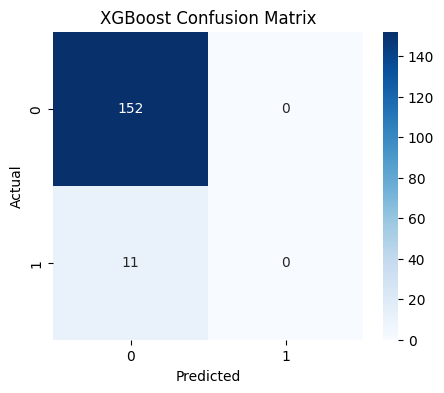

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


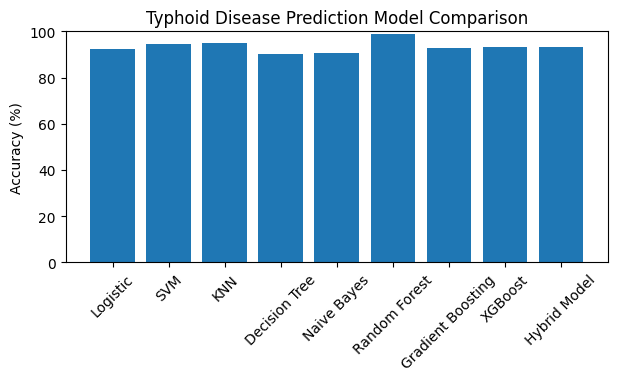

In [24]:
models = [
    "Logistic", "SVM", "KNN", "Decision Tree",
    "Naive Bayes", "Random Forest", "Gradient Boosting", "XGBoost","Hybrid Model"
]

accuracy = [92.6,94.4,95,90.1,90.8,98.7,93,93.2,93.25]  # example

plt.figure(figsize=(7,3))
plt.bar(models, accuracy)
plt.ylabel("Accuracy (%)")
plt.title("Typhoid Disease Prediction Model Comparison")
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # এখানে train করতে হবে
feature_importance = rf.feature_importances_


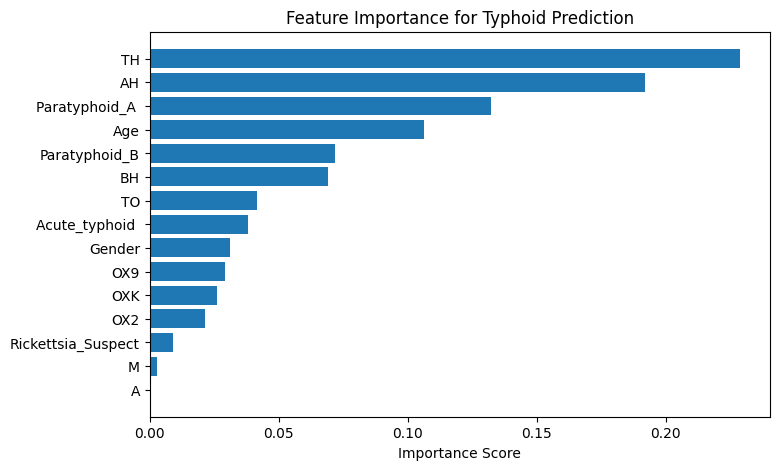

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_

fi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Typhoid Prediction")
plt.xlabel("Importance Score")
plt.show()

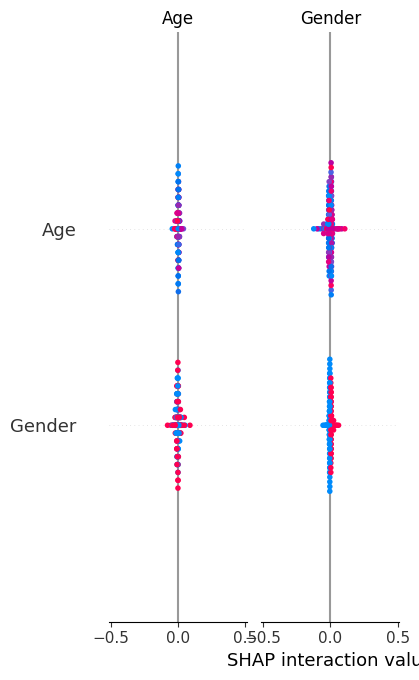

In [34]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
